# Chapter 5: Insurance and Alternative Risk Transfer Programs

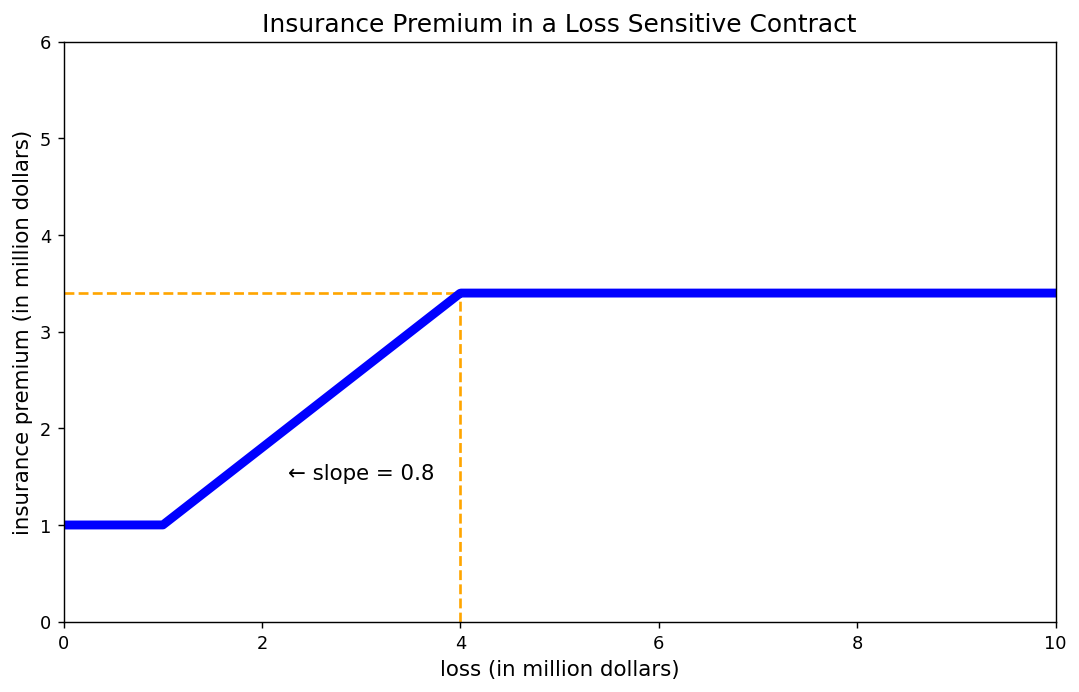

In [2]:
import numpy as np
import matplotlib.pyplot as plt

loss = np.linspace(0,10,1000) 
premium = np.zeros((1000,))

for i in range(1000):
    if loss[i]<1:
        premium[i]=1
    elif loss[i]<4:
        premium[i]=1 + 0.8*(loss[i]-1)
    else:
        premium[i]=3.4

fig = plt.figure(dpi=128, figsize=(10,6))
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,6])

x1 = np.array([0, 1, 2, 3, 4])
y1 = np.array([3.4,3.4,3.4,3.4,3.4])
x2 = np.array([4,4,4,4,4])
y2 = np.array([0, 1, 2, 3,3.4])

plt.plot(x1, y1, '--',color='orange')
plt.plot(x2, y2, '--',color='orange')
plt.plot(loss, premium, color='blue', label='portfolio return',linewidth = '5')
plt.xlabel('loss (in million dollars)',fontsize=12)
plt.ylabel('insurance premium (in million dollars)',fontsize=12)
plt.title('Insurance Premium in a Loss Sensitive Contract',fontsize=14)
plt.figtext(0.3,0.31,'← slope = 0.8',size=12)
plt.show()      

In [98]:
!pip install openpyxl
import pandas as pd

file = 'finite_risk_contracts.xlsx'

df = pd.read_excel(file,index_col='items')
df.loc['Payment to the insured'] = [-2000,-10000,-3000]
df.loc['Insurance premium'] = [3000,3000,3000]
df.loc['Fee'] = -0.08*df.loc['Insurance premium'] 

for year in (1,2,3):
    df_yr = df[f'Year {year}']
    if year==1:
        df_yr['Previous year balance'] = 0
    else:
        df_yr['Previous year balance'] = df[f'Year {year-1}']['End-year balance']
    df_yr['Beginning balance'] = df_yr['Previous year balance':'Fee'].sum()
    df_yr['Interest earned'] = int(0.05*df_yr['Beginning balance'])                                        
    df_yr['End-year balance'] = df_yr['Beginning balance']+df_yr['Payment to the insured':'Interest earned'].sum()                                     

print(df)
df.to_excel('finite_risk_contracts_filled.xlsx',index=True,sheet_name='filled')

                       Year 1  Year 2 Year 3
items                                       
Year Beginning                              
Previous year balance       0     898  -6160
Insurance premium        3000    3000   3000
Fee                      -240    -240   -240
Beginning balance        2760    3658  -3400
Year End                                    
Payment to the insured  -2000  -10000  -3000
Interest earned           138     182   -170
End-year balance          898   -6160  -6570


Question 2:

In [9]:
losses = [0, 2000, 5000, 10000, 50000, 500000]
probabilities = [0.9335, 0.05, 0.01, 0.005, 0.001, 0.0005]
losses_a = [0]*len(losses)
losses_b = [0]*len(losses)
losses_c = [0]*len(losses)

for i in range(len(losses)):
    losses_a[i] = losses[i]
    losses_b[i] = min(200000,max(0,losses[i]-5000))
    losses_c[i] = min(200000,max(0,0.2*losses[i]-5000))

print(f"the claim for policy a is \n{losses_a}")  
print(f"the claim for policy b is \n{losses_b}")    
print(f"the claim for policy c is \n{losses_c}")   

mu_a = 0
mu_b = 0
mu_c = 0

for i in range(len(losses)):
    mu_a += losses_a[i]*probabilities[i]
    mu_b += losses_b[i]*probabilities[i]
    mu_c += losses_c[i]*probabilities[i]    

print(f"the expected claim cost for policy a is {mu_a}")  
print(f"the expected claim cost for policy b is {mu_b}")    
print(f"the expected claim cost for policy c is {mu_c}")   

the claim for policy a is 
[0, 2000, 5000, 10000, 50000, 500000]
the claim for policy b is 
[0, 0, 0, 5000, 45000, 200000]
the claim for policy c is 
[0, 0, 0, 0, 5000.0, 95000.0]
the expected claim cost for policy a is 500.0
the expected claim cost for policy b is 170.0
the expected claim cost for policy c is 52.5


Question 3:

In [11]:
losses = {5000:0.01, 2000:0.05, 500:0.1, 0:0.84}
exp_loss = 0
processing_cost = 500

for v, p in losses.items():
    exp_loss += p*v

total_cost = exp_loss + processing_cost 
loading = processing_cost/exp_loss 
    
print(f"the expected claim is {exp_loss}")  
print(f"the total costs is {total_cost}")    
print(f"the loading is {loading}")   

the expected claim is 200.0
the total costs is 700.0
the loading is 2.5


Question 4:

In [12]:
exp_loss_deductible = 0

for v, p in losses.items():
    exp_loss_deductible += p*max(0,v-500)
    
print(f"the expected claim with deductible is {exp_loss_deductible}")  
print(f"the savings under the deductible policy is {exp_loss - exp_loss_deductible}")    
print(f"the loading is {processing_cost/exp_loss_deductible}")       

the expected claim with deductible is 120.0
the savings under the deductible policy is 80.0
the loading is 4.166666666666667


Question 5:

In [13]:
exp_loss_limit = 0

for v, p in losses.items():
    exp_loss_limit += p*min(v, 2000)
    
print(f"the expected claim with limit is {exp_loss_limit}")  
print(f"the savings under the limit policy is {exp_loss - exp_loss_limit}")    
print(f"the loading is {processing_cost/exp_loss_limit}") 

the expected claim with limit is 170.0
the savings under the limit policy is 30.0
the loading is 2.9411764705882355


Question 6:

In [14]:
exp_loss_copay = 0

for v, p in losses.items():
    exp_loss_copay += p*(v-0.1*v)
    
print(f"the expected claim with copay is {exp_loss_copay}")  
print(f"the savings under the copay policy is {exp_loss - exp_loss_copay}")    
print(f"the loading is {processing_cost/exp_loss_copay}")

the expected claim with copay is 180.0
the savings under the copay policy is 20.0
the loading is 2.7777777777777777


Question 8:

In [3]:
import pandas as pd

file = 'finite_risk_contracts.xlsx' 

df = pd.read_excel(file,index_col='items') 
df.loc['Payment to the insured'] = [-3000,-8000,-4000]
df.loc['Insurance premium'] = [4000,4000,4000]
df.loc['Fee'] = -0.06*df.loc['Insurance premium'] 

for year in (1,2,3):  
    df_yr = df[f'Year {year}'] 
    if year==1:
        df_yr['Previous year balance'] = 0  
    else:
        df_yr['Previous year balance'] = df[f'Year {year-1}']['End-year balance']  
    df_yr['Beginning balance'] = df_yr['Previous year balance':'Fee'].sum()
    df_yr['Interest earned'] = int(0.045*df_yr['Beginning balance'])                                       
    df_yr['End-year balance'] = df_yr['Beginning balance']+df_yr['Payment to the insured':'Interest earned'].sum()                                     

print(df)  
df.to_excel('finite_risk_contracts_filledQ8.xlsx',index=True,sheet_name='filled')     


                        Year 1  Year 2  Year 3
items                                         
Year Beginning                                
Previous year balance        0   929.0 -3100.0
Insurance premium         4000    4000    4000
Fee                     -240.0  -240.0  -240.0
Beginning balance       3760.0  4689.0   660.0
Year End                                      
Payment to the insured   -3000   -8000   -4000
Interest earned            169     211      29
End-year balance         929.0 -3100.0 -3311.0


In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.  Downloading openpyxl-3.0.7-py2.py3-none-any.whl (243 kB)

